In [1]:
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn import svm
from sklearn.decomposition import PCA

# 1. Data Understanding & Cleaning

A. Read ‘vehicle.csv’ and save as DataFram

In [2]:
df=pd.read_csv("vehicle.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [4]:
df.shape

(846, 19)

1.B. Check percentage of missing values and impute with correct approach.

In [5]:
df.isnull().sum() / df.shape[0] * 100.00

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [6]:
df.median()

/var/folders/7p/5k1s0qxj2mn1kmk2d_npxq8r0000gn/T/ipykernel_18818/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [7]:
# function to replace missing values with median values
def impute_with_median (df):
#    """Iterate through columns of Pandas DataFrame.
#    Where NaNs exist replace with median"""
    
   # Get list of DataFrame column names
    cols = list(df)
    # Loop through columns
    for column in cols:
        # Transfer column to independent series
        col_data = df[column]
        # Look to see if there is any missing numerical data
        missing_data = sum(col_data.isna())
        if missing_data > 0:
            # Get median and replace missing numerical data with median
            col_median = col_data.median()
            col_data.fillna(col_median, inplace=True)
            df[column] = col_data
    return df  

In [8]:
df1=impute_with_median (df)

In [9]:
df1.isnull().sum() / df.shape[0] * 100.00

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

C. Visualize a Pie-chart and print percentage of values for variable ‘class’. 

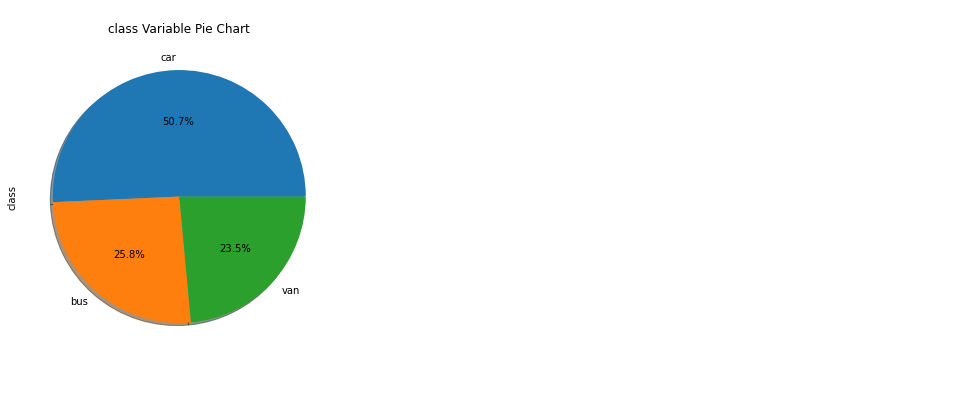

In [10]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
axes[0].set_title('class Variable Pie Chart')
axes[1].set_axis_off()
plt.subplots_adjust(wspace=1)
plt.show()

1.D. Check for duplicate rows in the data and impute with correct approach.

In [11]:
duplicate = df[df.duplicated()]
duplicate

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


There is no duplicate in Data

# 2. Data Preparation

2.A. Split data into X and Y. [Train and Test optional] 

In [12]:
# Arrange data into independent variables and dependent variables
X=df1.drop(columns=['class'])
y=df1['class'] #target

2.B. Standardize the Data (Z Score scale  of Features )

In [13]:
XScaled=X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


In [14]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.25, random_state=10)

# 3. Model Building

3.A. Train a base Classification model using SVM.

In [15]:
clf = svm.SVC(gamma=0.025, C=3)    

gamma is a measure of influence of a data point. It is inverse of distance of influence. C is penalty of wrong classifications. 

In [16]:
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [17]:
y_pred = clf.predict(X_test)

In [18]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.98      0.97      0.97        58
         car       0.99      0.95      0.97       108
         van       0.88      0.98      0.93        46

    accuracy                           0.96       212
   macro avg       0.95      0.97      0.96       212
weighted avg       0.96      0.96      0.96       212



In [19]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9622641509433962


3.B. Print Classification metrics for train data.

In [20]:
print("Confusion Matrix:\n",confusion_matrix(y_pred,y_test))

Confusion Matrix:
 [[ 56   1   0]
 [  0 103   1]
 [  2   4  45]]


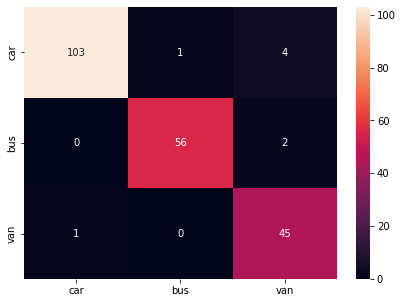

In [21]:
cm = confusion_matrix(y_test, y_pred, labels=["car", "bus","van"])

df_cm = pd.DataFrame(cm, index = [i for i in ["car","bus","van"]],
                  columns = [i for i in ["car","bus","van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

3.C. Apply PCA on the data with 10 components

 Calculating the covariance between attributes after scaling
 Covariance tells about information contained in the mathematical space between the independent attributes.

In [22]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

Eigenvalues and Eigenvectors

In [23]:
#Finding eigenvalues amd eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02  

In [24]:
pca = PCA(n_components=10)
pca.fit(XScaled)

PCA(n_components=10)

Eigenvalues

In [25]:
print(pca.explained_variance_)


[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


Eigen Vectors 

In [26]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [27]:
print(pca.explained_variance_ratio_)


[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


3.D. Visualize Cumulative Variance Explained with Number of Components. 

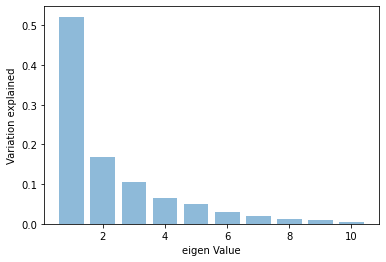

In [28]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

3.E. Draw a horizontal line on the above plot to highlight the threshold of 90%.

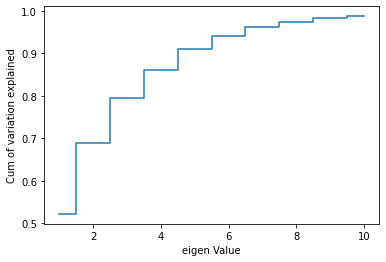

In [30]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

90 % of the value covered by 6 

3.F  Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [31]:
pca6 = PCA(n_components=6)
pca6.fit(XScaled)
Xpca6 = pca6.transform(XScaled)

In [32]:
X.shape

(846, 18)

In [33]:
Xpca6.shape

(846, 6)

In [34]:
df_pca = pd.DataFrame(Xpca6)

In [35]:
df_pca.head()

,0,1,2,3,4,5
0,0.334162,-0.219026,1.001584,0.176612,0.079301,-0.757447
1,-1.591711,-0.420603,-0.369034,0.233234,0.693949,-0.517162
2,3.769324,0.195283,0.087859,1.202212,0.731732,0.705041
3,-1.738598,-2.829692,0.109456,0.376685,-0.362897,-0.484431
4,0.558103,4.758422,11.703647,0.147464,3.256953,-0.203446


In [36]:
df_pca['class']=df['class']

In [37]:
df_pca.head()

,0,1,2,3,4,5,class
0,0.334162,-0.219026,1.001584,0.176612,0.079301,-0.757447,van
1,-1.591711,-0.420603,-0.369034,0.233234,0.693949,-0.517162,van
2,3.769324,0.195283,0.087859,1.202212,0.731732,0.705041,car
3,-1.738598,-2.829692,0.109456,0.376685,-0.362897,-0.484431,van
4,0.558103,4.758422,11.703647,0.147464,3.256953,-0.203446,bus


3.G. Train SVM model on components selected from above step. 

In [38]:
X_PCA=df_pca.drop(columns=['class'])
y_PCA=df_pca['class'] #target

In [39]:
# Split X and y into training and test set in 70:30 ratio
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.25, random_state=10)

In [40]:
clf_pca = svm.SVC(gamma=0.025, C=3)    
clf_pca.fit(X_train_PCA , y_train_PCA)
y_pred_pca = clf_pca.predict(X_test_PCA)

In [41]:
clf_pca

SVC(C=3, gamma=0.025)

In [42]:
cm = confusion_matrix(y_test_PCA, y_pred_pca)

3.H. Print Classification metrics for train data of above model and share insights. 

In [43]:
print ("Accuracy : ", accuracy_score(y_test_PCA, y_pred_pca))

Accuracy :  0.8537735849056604


In [46]:
print(metrics.classification_report(y_test_PCA, y_pred_pca))

              precision    recall  f1-score   support

         bus       0.94      0.76      0.84        58
         car       0.85      0.91      0.88       108
         van       0.78      0.85      0.81        46

    accuracy                           0.85       212
   macro avg       0.86      0.84      0.84       212
weighted avg       0.86      0.85      0.85       212



In [44]:
print("Confusion Matrix:\n",confusion_matrix(y_pred_pca,y_test_PCA))

Confusion Matrix:
 [[44  3  0]
 [10 98  7]
 [ 4  7 39]]


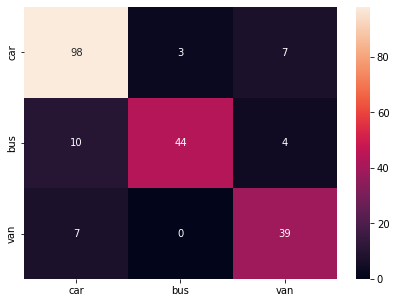

In [45]:

cm = confusion_matrix(y_test_PCA, y_pred_pca, labels=["car", "bus","van"])
df_cm = pd.DataFrame(cm, index = [i for i in ["car","bus","van"]],
                  columns = [i for i in ["car","bus","van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

Observation : 
The accuracy, precision and recall value is reduced after applying PCA because we have reduced the dimensions.
Despite giving less accuracy, precision and recall, this model is better as it has taken into consideration the relationship between the independent varibales and reduced the columns which are highly correlated.

4. Performance Improvement: 

4.A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. 

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
X_PCA_hp=df_pca.drop(columns=['class'])
y_PCA_hp=df_pca['class'] #target

In [49]:
X_train_PCA_hp, X_test_PCA_hp, y_train_PCA_hp, y_test_PCA_hp = train_test_split(X_PCA_hp,y_PCA_hp, test_size=0.25, random_state=10)

In [50]:
svc = svm.SVC()

In [51]:
parameters ={'C': [1,2,3,4,5.5,6,6.5,7,8,9,10],
             'kernel':('linear', 'rbf'),
             'gamma': [0.010,0.025,0.030,0.035,0.040,0.045,0.050,0.052,0.053,0.054]
    
}

In [52]:
clf_hp = GridSearchCV(svc, parameters, cv=10)

In [53]:
clf_hp.fit(X_train_PCA_hp, y_train_PCA_hp)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5.5, 6, 6.5, 7, 8, 9, 10],
                         'gamma': [0.01, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05,
                                   0.052, 0.053, 0.054],
                         'kernel': ('linear', 'rbf')})

4.B. Share best Parameters observed from above step. 

In [54]:
print("Best Hyper Parameters:\n", clf_hp.best_params_)

Best Hyper Parameters:
 {'C': 8, 'gamma': 0.052, 'kernel': 'rbf'}


4.C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with
insights

In [55]:
model = clf_hp.best_estimator_

In [56]:
pred_hp = model.predict(X_test_PCA_hp)

In [57]:
pred_hp.shape

(212,)

In [58]:
y_test_PCA_hp.shape

(212,)

In [59]:
print(metrics.classification_report(y_test_PCA_hp, pred_hp))

              precision    recall  f1-score   support

         bus       0.94      0.88      0.91        58
         car       0.91      0.92      0.91       108
         van       0.84      0.89      0.86        46

    accuracy                           0.90       212
   macro avg       0.90      0.90      0.90       212
weighted avg       0.90      0.90      0.90       212



Without PCA 

In [60]:
print(metrics.classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

         bus       0.98      0.97      0.97        58
         car       0.99      0.95      0.97       108
         van       0.88      0.98      0.93        46

    accuracy                           0.96       212
   macro avg       0.95      0.97      0.96       212
weighted avg       0.96      0.96      0.96       212



With PCA

In [61]:
print(metrics.classification_report(y_test_PCA, y_pred_pca))

              precision    recall  f1-score   support

         bus       0.94      0.76      0.84        58
         car       0.85      0.91      0.88       108
         van       0.78      0.85      0.81        46

    accuracy                           0.85       212
   macro avg       0.86      0.84      0.84       212
weighted avg       0.86      0.85      0.85       212



After Hyper Tuning

In [62]:
print(metrics.classification_report(y_test_PCA_hp, pred_hp))

              precision    recall  f1-score   support

         bus       0.94      0.88      0.91        58
         car       0.91      0.92      0.91       108
         van       0.84      0.89      0.86        46

    accuracy                           0.90       212
   macro avg       0.90      0.90      0.90       212
weighted avg       0.90      0.90      0.90       212



Observation : 
 1.After apply PCA accuracy scored reduced from 96 to 85. But we have reduced the dimensions.
Despite giving less accuracy, precision and recall, this model is better as it has taken into consideration the relationship between the independent varibales and reduced the columns which are highly correlated.
2. After our hyper tuning parameters using grid serach perfomce incresed from 85 to 90 . 

# 5. Data Understanding & Cleaning: 

5.A. Explain pre-requisite/assumptions of PCA.

1.There must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves.

2.PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise. Pearson correlation coefficient framework led to the origin of PCA, and there it was assumed first that the axes with high variance would only be turned into principal components.

3.All variables should be accessed on the same ratio level of measurement. The most preferred norm is at least 150 observations of the sample set with a ratio measurement of 5:1.

4.Extreme values that deviate from other data points in any dataset, which are also called outliers, should be less. More number of outliers will represent experimental errors and will degrade your ML model/algorithm.

5.The feature set must be correlated and the reduced feature set after applying PCA will represent the original data set but in an effective way with fewer dimensions.

5.B. Explain advantages and limitations of PCA.

Advantages:

1. Removes Correlated Features:
2.Improves Algorithm Performance: 
3. Reduces Overfitting: 
4. Improves Visualization: 

Limitations

In [ ]:
1. Independent variables become less interpretable:
2. Data standardization is must before PCA: 
3. Information Loss: 